# Preprocessing

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
dataPath = "./data/dataset.csv"
df = pd.read_csv(dataPath, index_col=0)

In [3]:
columns = list(df.columns)
columnsToKeep = columns[4: -1]
columnsToKeep

['popularity',
 'duration_ms',
 'explicit',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'time_signature']

In [4]:
df = df[columnsToKeep]
df

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4
1,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4
2,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4
3,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3
4,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5
113996,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4
113997,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4
113998,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4


In [5]:
# Bool to numerical data for explicit row
df.loc[:, 'explicit'] = df['explicit'].astype(int)

# One hot encoding for nominal categroies
df = pd.get_dummies(df, columns=['key', 'time_signature'], dtype=int)

In [6]:
df

,popularity,duration_ms,explicit,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,...,key_7,key_8,key_9,key_10,key_11,time_signature_0,time_signature_1,time_signature_3,time_signature_4,time_signature_5
0,73,230666,0,0.676,0.4610,-6.746,0,0.1430,0.0322,0.000001,...,0,0,0,0,0,0,0,0,1,0
1,55,149610,0,0.420,0.1660,-17.235,1,0.0763,0.9240,0.000006,...,0,0,0,0,0,0,0,0,1,0
2,57,210826,0,0.438,0.3590,-9.734,1,0.0557,0.2100,0.000000,...,0,0,0,0,0,0,0,0,1,0
3,71,201933,0,0.266,0.0596,-18.515,1,0.0363,0.9050,0.000071,...,0,0,0,0,0,0,0,1,0,0
4,82,198853,0,0.618,0.4430,-9.681,1,0.0526,0.4690,0.000000,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,21,384999,0,0.172,0.2350,-16.393,1,0.0422,0.6400,0.928000,...,0,0,0,0,0,0,0,0,0,1
113996,22,385000,0,0.174,0.1170,-18.318,0,0.0401,0.9940,0.976000,...,0,0,0,0,0,0,0,0,1,0
113997,22,271466,0,0.629,0.3290,-10.895,0,0.0420,0.8670,0.000000,...,0,0,0,0,0,0,0,0,1,0
113998,41,283893,0,0.587,0.5060,-10.889,1,0.0297,0.3810,0.000000,...,1,0,0,0,0,0,0,0,1,0


In [7]:
def min_max_scaling(df):
    min_vals = df.min()
    max_vals = df.max()

    feature_range = max_vals - min_vals

    # Check if any feature has zero range
    zero_range_features = feature_range[feature_range == 0].index

    # Remove features with zero range from normalization
    valid_features = feature_range[feature_range != 0].index
    df_normalized = (df[valid_features] - min_vals[valid_features]) / feature_range[valid_features]

    # Concatenate back the zero range features
    if not zero_range_features.empty:
        df_normalized = pd.concat([df_normalized, df[zero_range_features]], axis=1)

    return df_normalized

def standard_scaling(df):
    mean = df.mean()
    std = df.std()
    return (df - mean) / std

responseFrame = df.pop('valence')
predictorFrame = df

# Min-Max scaling for predictor variables
df_normalized = min_max_scaling(predictorFrame)

# Standard scaling for predictor variables
df_standardized = standard_scaling(predictorFrame)

predictorFrame_scaled = df_normalized

# NN

In [8]:
def relu(z):
    return np.maximum(0, z)

def tanh(z):
    return np.tanh(z)

def linear(z):
    return z

def reluDer(z):
    return np.where(z > 0, 1, 0)

def tanhDer(z):
    return 1 - z**2

def linearDer(z):
    return 1

activationDict = {'relu': relu, 'tanh': tanh, 'linear': linear}
activationDerivativeDict = {'relu': reluDer, 'tanh': tanhDer, 'linear': linearDer}

In [9]:
class Layer:
    def __init__(self, inputNumNeuron, numNeurons, activationName, batchSize):
        self.batchSize = batchSize
        self.inputNumNeuron = inputNumNeuron
        self.numNeurons = numNeurons
        self.activationName = activationName
        self.activation = activationDict[self.activationName]
        self.activationDerivative = activationDerivativeDict[self.activationName]
        self.dZ_state = np.empty((numNeurons, batchSize))
        self.Z_state = np.empty((numNeurons, batchSize))
        self.A_state = np.empty((numNeurons, batchSize))
        self.dW_state = np.zeros((self.numNeurons, self.inputNumNeuron))
        self.db_state = np.zeros((self.numNeurons, 1))
        self.initWeights()

    def initWeights(self):
        # Random initialization unfortunately failed.
        # self.W = np.random.randn(self.numNeurons, self.inputNumNeuron)
        # self.b = np.random.randn(self.numNeurons, 1)

        # Xavier initialization for weights
        self.W = np.random.randn(self.numNeurons, self.inputNumNeuron) * np.sqrt(1 / self.inputNumNeuron)
        # Initializing biases with zeros
        self.b = np.zeros((self.numNeurons, 1))
        
    def updateForwardState(self, inputToLayer):
        # print('\nupdateForwardState():\n', 'inputToLayer:', inputToLayer.shape, 'self.W', self.W.shape, 'self.b', self.b.shape)
        inducedLocal = np.matmul(self.W, inputToLayer) + self.b
        output = self.activation(inducedLocal)
        self.Z_state = inducedLocal
        self.A_state = output
        return output
    
    def predict(self, inputToLayer, printVals=False):
        inducedLocal = np.matmul(self.W, inputToLayer) + self.b
        output = self.activation(inducedLocal)
        if printVals:
            print('inp:', self.b, self.W, 'out:', output)
        return output

    def updateDeltaState(self, dA):
        # Derivative of loss over the weihts of this layer
        # print('\nupdateDeltaState():\n', 'dA:', dA.shape, 'self.Z_state', self.Z_state.shape)
        derActivation = self.activationDerivative(self.Z_state)
        dZ = np.multiply(dA, derActivation)
        self.dZ_state = dZ

    def calculateChange(self, A_input):
        self.dW_state = (1 / self.batchSize) * np.dot(self.dZ_state, A_input.T)
        self.db_state = (1 / self.batchSize) * np.sum(self.dZ_state, axis=1, keepdims=True)
        # print('\ncalculateChange():\n', 'self.dW_state:', self.dW_state, 'self.db_state', self.db_state, 'A_input:', A_input.T, 'self.Z_state', self.Z_state)
        # print('\ncalculateChange():\n', 'A_input:', A_input.T.shape, 'self.Z_state', self.Z_state.shape, 'self.dW_state', self.dW_state.shape, 'self.db_state', self.db_state.shape)

    def updateWeightsAndBias(self, lr):
        self.W = self.W - lr * self.dW_state
        self.b = self.b - lr * self.db_state
            
    def __repr__(self):
        return "Input Dim: " + str(self.inputNumNeuron) + ", Number of Neurons: " + str(self.numNeurons) + "\n Activation: " + self.activationName

In [10]:
class NeuralNetwork:
    def __init__(self):
        self.layers = []
        self.loss_history = []
        self.test_loss_history = []

    def addLayer(self, layer):
        self.layers.append(layer)

    def loss(self, predictions, y):
        # MSE
        batchSize = y.size
        error = y - predictions
        squaredError = np.dot(error.T, error)
        mse = (1 / batchSize) * squaredError
        return mse
    
    def lossDer(self, predictions, y):
        # MSE Derivative
        batchSize = y.size
        error = y - predictions
        mseDer = (-2 / batchSize) * np.sum(error, axis=0, keepdims=True)
        return mseDer
    
    def predict(self, testPredictor):
        output = testPredictor
        for layer in self.layers:
            printVals = True if False else False
            output = layer.predict(output, printVals)
        return output
    
    def forward(self, trainPredictor):
        output = trainPredictor
        for layer in self.layers:
            output = layer.updateForwardState(output)
        return output
    
    def backprop(self, predictions, y, x, lr):
        # Update Delta State
        for layerNumber in reversed(range(len(self.layers))):
            layer = self.layers[layerNumber]
            inputToLayer = self.layers[layerNumber - 1].A_state if layerNumber > 0 else x
            
            # Output Layer
            if(layer == self.layers[-1]):
                y_reshaped = np.reshape(y, (1, y.size))
                lossDerivative = self.lossDer(predictions, y_reshaped)
                # print('\nbackpropFirst():\n', 'predictions:', predictions.shape, 'y_reshaped:', y_reshaped.shape, 'lossDerivative:', lossDerivative.shape, 'inputToLayer', inputToLayer.shape)
                layer.updateDeltaState(lossDerivative)
                layer.calculateChange(inputToLayer)
            # Hidden Layers
            else:
                dZ_next = nextLayer.dZ_state
                W_next = nextLayer.W
                dA = np.dot(W_next.T, dZ_next)
                # print('\nbackpropAlt():\n', 'dZ_next:', dZ_next.shape, 'W_next', W_next.shape, 'dA:', dA.shape)
                layer.updateDeltaState(dA)
                layer.calculateChange(inputToLayer)

            nextLayer = layer

        # Update Weights and Bias
        for layerNumber in range(len(self.layers)):
            layer = self.layers[layerNumber]
            layer.updateWeightsAndBias(lr)

    def fit(self, mini_batches_x, mini_batches_y, mini_test_x, mini_test_y, lr=1e-2, epochAmount=10):
        for epoch in range(epochAmount):
            print('-----------EPOCH-----------    -----> ', epoch + 1)
            # Train using mini-batches
            for mini_batch_X, mini_batch_Y in zip(mini_batches_x, mini_batches_y):
                predictions = self.forward(mini_batch_X)
                self.backprop(predictions, mini_batch_Y, mini_batch_X, lr)

            predictions = self.predict(mini_batch_X)
            trainLoss = np.squeeze(self.loss(predictions.T, mini_batch_Y.T))
            print(f'Train Loss:', trainLoss)
            self.loss_history.append((epoch, trainLoss))

            testError = np.squeeze(self.testLoss(mini_test_x.T, mini_test_y))
            self.test_loss_history.append((epoch, testError))

        print('Final Train Loss:', trainLoss)

    def testLoss(self, test_x, test_y):
        predictions = np.squeeze(self.predict(test_x))
        lossMSE = self.loss(predictions, test_y)
        return lossMSE
    
    def plot_loss_history(self):
        iterations, losses = zip(*self.loss_history)
        _, testLosses = zip(*self.test_loss_history)
        plt.plot(iterations, losses)
        plt.plot(iterations, testLosses)
        plt.xlabel('Epoch')
        plt.ylabel('Training Loss')
        plt.title(f'Training Loss over Epochs NN (lr = {1e4}, epoch = {5000})')
        plt.legend(['Train', 'Test'])
        plt.show()

In [11]:
responseData = responseFrame.to_numpy()
predictorData = predictorFrame_scaled.to_numpy()

# Full batch gradient descent
batchSize = predictorData.shape[0]
trainSplit = 0.8
valSplit = 0.1
testSplit = 0.1

np.random.seed(42)
indices = np.arange(len(predictorData))
np.random.shuffle(indices)
trainIndices = indices[:int(trainSplit * len(indices))]
valIndices = indices[int(trainSplit* len(indices)):int((trainSplit + valSplit) * len(indices))]
testIndices = indices[int((trainSplit + valSplit) * len(indices)):]

trainPredictor, testPredictor, valPredictor = predictorData[trainIndices], predictorData[testIndices], predictorData[valIndices]
trainResponse, testResponse, valResponse = responseData[trainIndices], responseData[testIndices], responseData[valIndices]

trainResponse = np.expand_dims(trainResponse, axis=1)

# Function to create mini-batches
def create_mini_batches(data, batch_size):
    mini_batches = []
    data_size = len(data)
    num_batches = data_size // batch_size
    
    for i in range(num_batches):
        start_idx = i * batch_size
        end_idx = start_idx + batch_size
        mini_batch = data[start_idx:end_idx]
        mini_batches.append(mini_batch.T)
    
    if data_size % batch_size != 0:
        mini_batch = data[num_batches * batch_size:]
        mini_batches.append(mini_batch.T)
    
    return np.array(mini_batches)

# Create mini-batches
mini_batches_X = create_mini_batches(trainPredictor, batch_size= batchSize)
mini_batches_Y = create_mini_batches(trainResponse, batch_size= batchSize)
miniTestX = testPredictor
miniTestY = testResponse
miniValX = valPredictor
miniValY = valResponse

In [12]:
import time

# Initialize NeuralNetwork
nn = NeuralNetwork()
nn.addLayer(Layer(mini_batches_X[0].shape[0], 30, 'relu', batchSize))
nn.addLayer(Layer(30, 10, 'relu', batchSize))
nn.addLayer(Layer(10, 1, 'linear', batchSize))

start = time.time()
nn.fit(mini_batches_X, mini_batches_Y, miniTestX, miniTestY, lr=1e4, epochAmount=5000)
end = time.time()

print(f'Time elapsed: {end - start:.4}')

-----------EPOCH-----------    ----->  1
Train Loss: 0.1478713997217117
-----------EPOCH-----------    ----->  2
Train Loss: 0.103215585600085
-----------EPOCH-----------    ----->  3
Train Loss: 0.0813579088621786
-----------EPOCH-----------    ----->  4
Train Loss: 0.07161785943324553
-----------EPOCH-----------    ----->  5
Train Loss: 0.06760266545806705
-----------EPOCH-----------    ----->  6
Train Loss: 0.06600186922725747
-----------EPOCH-----------    ----->  7
Train Loss: 0.06533204308057143
-----------EPOCH-----------    ----->  8
Train Loss: 0.06500092311665417
-----------EPOCH-----------    ----->  9
Train Loss: 0.06479090835135339
-----------EPOCH-----------    ----->  10
Train Loss: 0.0646242783457664
-----------EPOCH-----------    ----->  11
Train Loss: 0.0644751971553353
-----------EPOCH-----------    ----->  12
Train Loss: 0.06433492075308433
-----------EPOCH-----------    ----->  13
Train Loss: 0.06420045163475728
-----------EPOCH-----------    ----->  14
Train Loss:

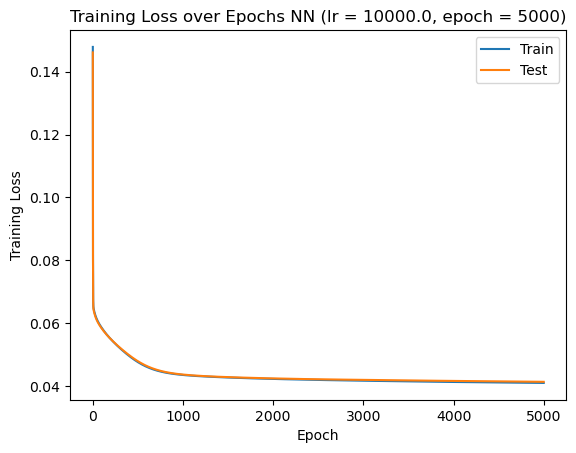

In [17]:
# nn.plot_loss_history()

## Validation Performance

In [14]:
valError = np.squeeze(nn.testLoss(miniValX.T, miniValY))
print('Validation Loss:', valError)

Validation Loss: 0.040871716747858146


## Measuring Performance

In [15]:
testError = np.squeeze(nn.testLoss(miniTestX.T, miniTestY))
print('Test Loss:', testError)

Test Loss: 0.041313497033163


In [16]:
demoInstanceLoc = 3
demoPredictor = predictorData[demoInstanceLoc]
demoResponse = responseData[demoInstanceLoc]
demoPredictor = np.expand_dims(demoPredictor, axis=0)
demoPrediction = np.squeeze(nn.predict(demoPredictor.T))
print('Prediction:', demoPrediction, 'Response:', demoResponse)

Prediction: 0.1508675251916351 Response: 0.143
